# Avaliando Modelo de Regressão

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [21]:

# carregando valores previstos
y_pred = np.load('./data/y_pred.npy')

# caarregando valores de teste
test_set = np.load('./data/test_set.npy')
y_test = test_set[:,-1]

# carregando valores originais (mortes acumulas)
data = pd.read_pickle('./data/dataframes/us_historical.pkl') \
        .assign(date = lambda df: df['date'].apply(pd.Period)) \
        .set_index('date').sort_index() \
        .loc['dec-2020', ['death', 'deathIncrease']]

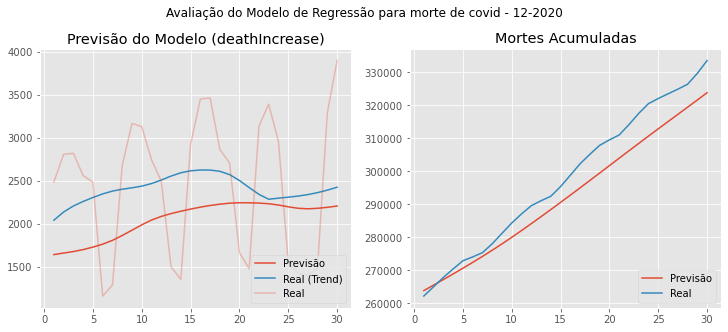

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4.5), constrained_layout=True)
xs = np.arange(len(y_pred))+1
ax1.plot(xs, y_pred, label='Previsão')
ax1.plot(xs, y_test, label='Real (Trend)')
ax1.plot(xs, data['deathIncrease'].values[:-1], label='Real', color='C0', alpha=.3)
ax1.set_title('Previsão do Modelo (deathIncrease)')

ax2.plot(xs, death[0]+np.cumsum(y_pred), label='Previsão')
ax2.plot(xs, death.values[:-1], label='Real')
ax2.set_title('Mortes Acumuladas')

fig.suptitle('Avaliação do Modelo de Regressão para morte de covid - 12-2020')
ax1.legend(loc=4)
ax2.legend(loc=4)
fig.savefig('data/imgs/model_performance.png', bbox_inches='tight')